![alt text](https://cienciadosdados.com/images/CINCIA_DOS_DADOS_4.png)
# <font color='Green'>Dicas e Truques de Ciência de Dados</font>
# <font color='Blue'>Como Escolher os Melhores Hyperparâmetros - RandomSearch</font>

![](https://2.bp.blogspot.com/-qVVwRATTy0c/XM5a2_rPjZI/AAAAAAAABIs/t4F4E_4tSgocN0gapKnO0_fuXBgNKrDHwCLcBGAs/s1600/teste%2Bvelocidade%2Balgar%2Btelecom%2Bitumbiara%252C%2Balgar%2Bfibra%2Bitumbiara%252Cplanos%2Bde%2Binternet%2Bfibra%25C3%25B3ptica%2Bitumbiara..gif)

# Ao Final desta aula, vc vai:

1. Ter construido uma **Máquina Preditiva de Incêncios** Florestais com o Algoritmo RandomForestRegressor

2. Ter aprendido como escolher os melhores Hyperparâmetros da Máquina Preditiva de forma automatizada e efetiva com o **RandomSearchCV**

3. Ganhar um **Bônus** - (Pacote Python com funcionalidade incrível)

# Ciência de Dados e seus Benefícios para Sociedade
![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Carbon_monoxide_from_Amazon_fires.gif/260px-Carbon_monoxide_from_Amazon_fires.gif)



Incêndio florestal, no mato ou vegetação pode ser descrito como qualquer combustão descontrolada e não prescrita ou queima de plantas em um ambiente natural, como uma floresta, pastagem, etc. 

Neste vídeo, estamos prevendo a confiança do incêndio florestal com base em alguns atributos. 

O que é confiança, Eduardo? Deixo a **NASA** responder para vc...

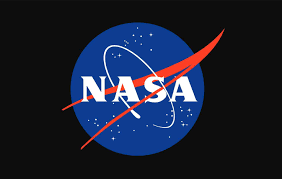
### **Confiança** (Target)

O valor de confiança foi adicionado para ajudar os usuários a avaliar a qualidade de pixels de incêndio individuais incluídos no produto de incêndio Nível 2. 

O campo de confiança deve ser usado com cautela; é provável que seu significado varie em diferentes partes do mundo. 

No entanto, alguns de nossos usuários finais descobriram que esse campo é útil para excluir ocorrências de incêndio **falso-positivas**.

O valor de confiança varia de 0% a 100% e pode ser usado para atribuir uma das três classes de fogo (fogo de baixa confiança, fogo de confiança nominal ou fogo de alta confiança) para todos os pixels de fogo dentro da máscara de fogo . Em algumas aplicações, erros de comissão (ou alarmes falsos) são particularmente indesejáveis ​​e, para essas aplicações, pode-se desejar negociar uma taxa de detecção mais baixa para obter uma taxa de alarmes falsos mais baixa.

https://earthdata.nasa.gov/faq/firms-faq

# **Por que** precisamos de um modelo de previsão de incêndios florestais?
Bem, a primeira pergunta que surge é por que precisamos do aprendizado de máquina para prever incêndios florestais nessa área específica? 

Então, sim, a pergunta é válida, apesar de ter o departamento florestal experiente que tem lidado com essas questões por muito tempo porque é que existe a necessidade do ML, tendo dito que a resposta é bastante simples que **o departamento florestal experiente pode verificar 3- 4 parâmetros de sua mente humana, mas o ML, por outro lado, pode lidar com os inúmeros parâmetros** se pode ser latitude, longitude, satélite, versão e outros atributos, portanto, lidar com essa **relação múltipla de um parâmetro** que é responsável pelo incêndio na floresta precisamos de ML com certeza!

#### Importando Pacotes

In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor


#### Conexão com os Dados

In [ ]:
forest = pd.read_csv('fire_archive.csv')

In [ ]:
forest.head()

latitude  longitude  brightness  scan  ...  bright_t31   frp  daynight type
0  -11.8070   142.0583       313.0   1.0  ...       297.3   6.6         D    0
1  -11.7924   142.0850       319.3   1.0  ...       297.3  11.3         D    0
2  -12.8398   132.8744       311.6   3.1  ...       298.7  23.1         D    0
3  -14.4306   143.3035       310.1   1.1  ...       296.1   6.5         D    0
4  -12.4953   131.4897       310.3   4.0  ...       298.8  27.6         D    0

[5 rows x 15 columns]

In [ ]:
forest.shape

(36011, 15)

In [ ]:
forest.columns

In [ ]:
forest.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

#### Obs: Ja faremos o Processamento em Tempo de Análise

In [ ]:
forest.isnull().dropna(inplace=True)

In [ ]:
forest.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [ ]:
forest.describe()

latitude     longitude  ...           frp          type
count  36011.000000  36011.000000  ...  36011.000000  36011.000000
mean     -19.100962    138.931446  ...     51.132176      0.019439
std        7.265777      9.261400  ...     92.280112      0.198326
min      -42.762800    114.104300  ...      0.000000      0.000000
25%      -26.370250    131.072250  ...     13.800000      0.000000
50%      -15.706500    136.738500  ...     25.800000      0.000000
75%      -13.343600    147.477500  ...     52.800000      0.000000
max      -10.072600    153.490400  ...   3679.500000      3.000000

[8 rows x 11 columns]

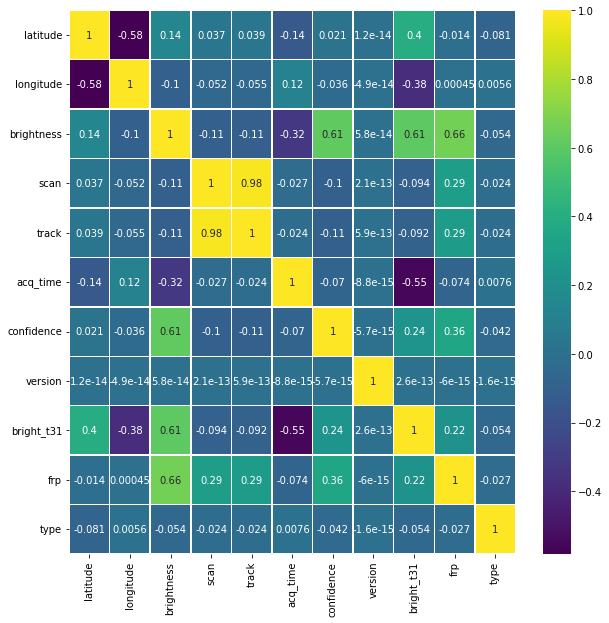

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)

#### Eliminando variável altamente correlacionada

In [ ]:
forest = forest.drop(['track'], axis = 1)

In [ ]:
print("The scan column")
print(forest['scan'].value_counts())
print()
print("The aqc_time column")
print(forest['acq_time'].value_counts())
print()
print("The satellite column")
print(forest['satellite'].value_counts())
print()
print("The instrument column")
print(forest['instrument'].value_counts())
print()
print("The version column")
print(forest['version'].value_counts())
print()
print("The daynight column")
print(forest['daynight'].value_counts())
print()

The scan column
1.0    8284
1.1    6000
1.2    3021
1.3    2412
1.4    1848
1.5    1610
1.6    1451
1.7    1281
1.8    1041
1.9     847
2.0     707
2.2     691
2.1     649
2.3     608
2.5     468
2.4     433
2.8     422
3.0     402
2.7     366
2.9     361
2.6     347
3.1     259
3.2     244
3.6     219
3.4     203
3.3     203
3.8     189
3.9     156
4.7     149
4.3     137
3.5     134
3.7     134
4.1     120
4.6     118
4.5     116
4.2     108
4.0     103
4.4     100
4.8      70
Name: scan, dtype: int64

The aqc_time column
506     851
454     631
122     612
423     574
448     563
       ... 
1558      1
635       1
1153      1
302       1
1519      1
Name: acq_time, Length: 662, dtype: int64

The satellite column
Aqua     20541
Terra    15470
Name: satellite, dtype: int64

The instrument column
MODIS    36011
Name: instrument, dtype: int64

The version column
6.3    36011
Name: version, dtype: int64

The daynight column
D    28203
N     7808
Name: daynight, dtype: int64



In [ ]:
forest = forest.drop(['instrument', 'version'], axis = 1)

In [ ]:
forest.head()

latitude  longitude  brightness  scan  ... bright_t31   frp daynight  type
0  -11.8070   142.0583       313.0   1.0  ...      297.3   6.6        D     0
1  -11.7924   142.0850       319.3   1.0  ...      297.3  11.3        D     0
2  -12.8398   132.8744       311.6   3.1  ...      298.7  23.1        D     0
3  -14.4306   143.3035       310.1   1.1  ...      296.1   6.5        D     0
4  -12.4953   131.4897       310.3   4.0  ...      298.8  27.6        D     0

[5 rows x 12 columns]

#### Transformando o domínio das variáveis para numéricas

In [ ]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

forest['daynight'] = forest['daynight'].map(daynight_map)
forest['satellite'] = forest['satellite'].map(satellite_map)

In [ ]:
forest.head()

latitude  longitude  brightness  scan  ... bright_t31   frp  daynight  type
0  -11.8070   142.0583       313.0   1.0  ...      297.3   6.6         1     0
1  -11.7924   142.0850       319.3   1.0  ...      297.3  11.3         1     0
2  -12.8398   132.8744       311.6   3.1  ...      298.7  23.1         1     0
3  -14.4306   143.3035       310.1   1.1  ...      296.1   6.5         1     0
4  -12.4953   131.4897       310.3   4.0  ...      298.8  27.6         1     0

[5 rows x 12 columns]

In [ ]:
forest['type'].value_counts()

0    35666
2      335
3       10
Name: type, dtype: int64

#### Criando variáveis Dummies - OneHotEncoding

In [ ]:
types = pd.get_dummies(forest['type'])
forest = pd.concat([forest, types], axis=1)

In [ ]:
forest = forest.drop(['type'], axis = 1)
forest.head()

latitude  longitude  brightness  scan    acq_date  ...   frp  daynight  0  2  3
0  -11.8070   142.0583       313.0   1.0  2019-08-01  ...   6.6         1  1  0  0
1  -11.7924   142.0850       319.3   1.0  2019-08-01  ...  11.3         1  1  0  0
2  -12.8398   132.8744       311.6   3.1  2019-08-01  ...  23.1         1  1  0  0
3  -14.4306   143.3035       310.1   1.1  2019-08-01  ...   6.5         1  1  0  0
4  -12.4953   131.4897       310.3   4.0  2019-08-01  ...  27.6         1  1  0  0

[5 rows x 14 columns]

In [ ]:
forest = forest.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

In [ ]:
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest['scan_binned'] = pd.cut(forest['scan'], bins=bins, labels=labels)

In [ ]:
forest.head()

latitude  longitude  brightness  scan  ... type_0  type_2  type_3  scan_binned
0  -11.8070   142.0583       313.0   1.0  ...      1       0       0            1
1  -11.7924   142.0850       319.3   1.0  ...      1       0       0            1
2  -12.8398   132.8744       311.6   3.1  ...      1       0       0            4
3  -14.4306   143.3035       310.1   1.1  ...      1       0       0            2
4  -12.4953   131.4897       310.3   4.0  ...      1       0       0            4

[5 rows x 15 columns]

#### Variáveis Temporais

In [ ]:
forest['acq_date'] = pd.to_datetime(forest['acq_date'])

In [ ]:
forest = forest.drop(['scan'], axis = 1)

In [ ]:
forest['year'] = forest['acq_date'].dt.year
forest.head()

In [ ]:
forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day

In [ ]:
forest.shape

(36011, 17)

#### Separação das Variáveis para Amostragem

In [ ]:
y = forest['confidence']
fin = forest.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'type_0'], axis = 1)

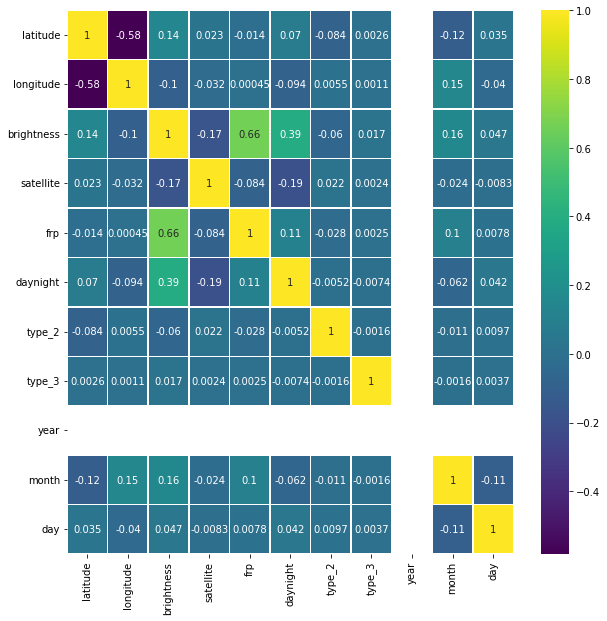

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)

In [ ]:
fin.head()


latitude  longitude  brightness  satellite  ...  scan_binned  year  month  day
0  -11.8070   142.0583       313.0          1  ...            1  2019      8    1
1  -11.7924   142.0850       319.3          1  ...            1  2019      8    1
2  -12.8398   132.8744       311.6          1  ...            4  2019      8    1
3  -14.4306   143.3035       310.1          1  ...            2  2019      8    1
4  -12.4953   131.4897       310.3          1  ...            4  2019      8    1

[5 rows x 12 columns]

In [ ]:
fin.isnull().sum()

In [ ]:
#fin.dropna( inplace=True)

#### Amostragem

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :500], y, test_size=0.2)

#### Criação da Máquina Preditiva

In [ ]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

In [ ]:
#Treinamento
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Avaliação por meio da Acurácia com dados de Treino
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

95.39 %


In [ ]:
#Avaliação por meio da Acurácia com dados de Teste
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

64.1 %


##### Salvando a MP

In [ ]:
import pickle 
saved_model = pickle.dump(random_model, open('ForestModelOld.pickle','wb'))

#### Mostrando os Hyperparâmetros

In [ ]:
random_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Como utilizar o RandomizedSearchCV
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRd7zTsEAckaW_D0n2F7cnb-JL72ZFD5XeY6w&usqp=CAU)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 20)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt']
  
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
  
#Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
  
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


#Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

In [ ]:
random_grid 

In [ ]:
rf_random = RandomizedSearchCV( estimator = random_model, 
                                param_distributions = random_grid, 
                                n_iter = 2,
                                cv = 2, 
                                verbose=3, 
                                random_state=42
                               )
# Fit the random search model
rf_random.fit(Xtrain, ytrain)

In [ ]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 447}

### Criando a MP com os Melhores Hyperparâmetros

In [ ]:
random_new = RandomForestRegressor(n_estimators = 447, 
                                   min_samples_split = 3, 
                                   min_samples_leaf = 1, 
                                   max_features = 'sqrt',
                                   max_depth = 25, 
                                   )

In [ ]:
#treinando
random_new.fit(Xtrain, ytrain)

RandomForestRegressor(max_depth=25, max_features='sqrt', min_samples_split=3,
                      n_estimators=447)

In [ ]:
y_pred1 = random_new.predict(Xtest)

In [ ]:
#acurácia em treino
random_model_accuracy1 = round(random_new.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy1, 2), '%')

93.92 %


In [ ]:
# Acurácia em teste
random_model_accuracy2 = round(random_new.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy2, 2), '%')

66.21 %


# Melhoramos 2,6% o que pra uns é POUCO, mas pra outros é MUITO e tá tudo bem....

In [ ]:
saved_model = pickle.dump(random_new, open('ForestModel.pickle','wb'))

# <font color='Blue'>Conforme Prometido - Bônus: Compactador de Máquinas Preditivas em Python</font>

![](https://www.loca-tudo.com/wp-content/uploads/2020/04/Aluguel-de-Compactador-de-Solo.jpg)

#bz2file

In [ ]:
import bz2

compressionLevel = 9
source_file = 'ForestModel.pickle' # this file can be in a different format, like .csv or others...
destination_file = 'ForestModel.bz2'

with open(source_file, 'rb') as data:
    tarbz2contents = bz2.compress(data.read(), compressionLevel)
    
fh = open(destination_file, "wb")
fh.write(tarbz2contents)
fh.close()

#Fim

## Valeu!

### # Onde me Encontrar - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="320" height="180" src="https://www.youtube.com/embed/WH6_pWe2_r0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

fonte:

https://www.analyticsvidhya.com/blog/2021/10/forest-fire-prediction-using-machine-learning/